## Dependencias

In [5]:
import pandas as pd
import numpy as np

from datetime import datetime

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns

## Lectura de datos

In [6]:
ruta = '/home/oscarjarillo/Documentos/Análisis Multivariado/Perceptron/diabetes.csv'

In [7]:
df = pd.read_csv(ruta)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Análisis exploratorio

### Valores nulos

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

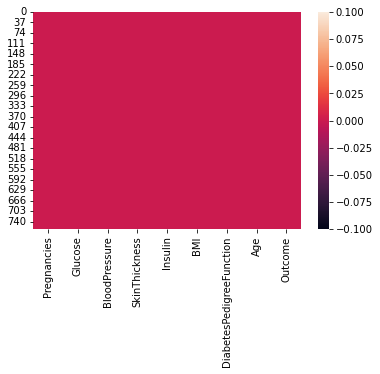

In [9]:
sns.heatmap(df.isnull(), cbar= True)

### Tipo de datos

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Cambio de nombre de la variable target

In [11]:
df.rename(columns= {'Outcome': 'With_db'}, inplace= True)

## Definición de variables

In [12]:
vt = ['With_db']
var_num = [x for x in df.columns if x != 'With_db']

## Partición

In [13]:
Xt, Xv, yt, yv = train_test_split(df[var_num], df[vt[0]], train_size= 0.7)
Xt.reset_index(drop = True, inplace= True)
Xv.reset_index(drop = True, inplace= True)
yt.reset_index(drop = True, inplace= True)
yv.reset_index(drop = True, inplace= True)

In [14]:
Xt.shape, yv.shape

((537, 8), (231,))

## Aprendizaje

### Hiperparámetros

In [15]:
hp = dict(max_iter = range(100,200),
         fit_intercept = [True, False],
         C = np.arange(0.1,3,0.1))

In [16]:
modelo = PassiveAggressiveClassifier()

### Hiperparametrización

In [17]:
grid = GridSearchCV(param_grid= hp,
                   cv = 3,
                   scoring= 'accuracy',
                   n_jobs = -1,
                   verbose = True,
                   estimator = modelo)

## Entrenamiento

In [18]:
grid.fit(Xt, yt)

Fitting 3 folds for each of 5800 candidates, totalling 17400 fits


GridSearchCV(cv=3, estimator=PassiveAggressiveClassifier(), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9]),
                         'fit_intercept': [True, False],
                         'max_iter': range(100, 200)},
             scoring='accuracy', verbose=True)

### Mejores parámetros

In [19]:
grid.best_params_

{'C': 0.2, 'fit_intercept': True, 'max_iter': 162}

In [20]:
modelo = grid.best_estimator_
modelo

PassiveAggressiveClassifier(C=0.2, max_iter=162)

## Validación del modelo

### Probabilidad

In [21]:
print(accuracy_score(y_pred= modelo.predict(Xt), y_true = yt))
print(accuracy_score(y_pred= modelo.predict(Xv), y_true = yv))

0.6350093109869647
0.6926406926406926


### Matriz de confusión

In [22]:
print(confusion_matrix(y_pred= modelo.predict(Xt), y_true = yt))
print(confusion_matrix(y_pred= modelo.predict(Xv), y_true = yv))

[[286  74]
 [122  55]]
[[121  19]
 [ 52  39]]


## Predicciones

In [23]:
df['Pred'] = modelo.predict(df[var_num])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,With_db,Pred
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


array([[<AxesSubplot:title={'center':'With_db'}>,
        <AxesSubplot:title={'center':'Pred'}>]], dtype=object)

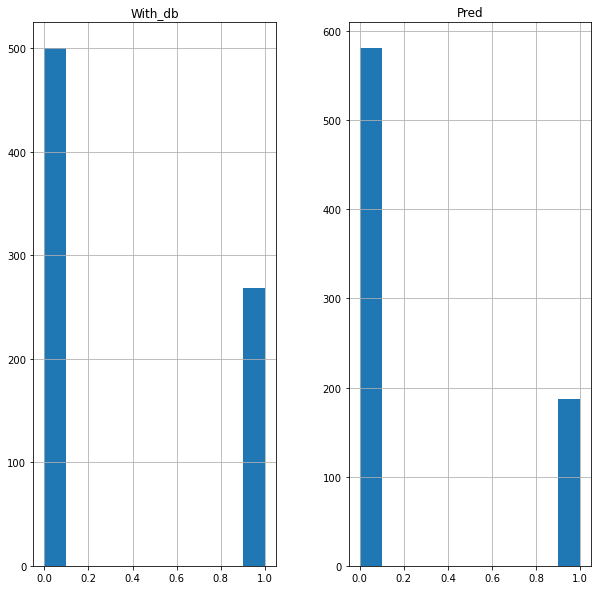

In [24]:
df[['With_db'] + ['Pred']].hist(figsize = (10,10))